In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
import ssl

from tensorflow import keras as keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,tf,keras:
    print((module.__name__, module.__version__))



2.1.0
sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)
('matplotlib', '3.1.1')
('numpy', '1.18.1')
('sklearn', '0.22')
('tensorflow', '2.1.0')
('tensorflow_core.python.keras.api._v2.keras', '2.2.4-tf')


In [9]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip


def load_data():
  """Loads the Fashion-MNIST dataset.
  Returns:
      Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
  License:
      The copyright for Fashion-MNIST is held by Zalando SE.
      Fashion-MNIST is licensed under the [MIT license](
      https://github.com/zalandoresearch/fashion-mnist/blob/master/LICENSE).
  """
  # dirname = os.path.join('datasets', 'fashion-mnist')
  # base = '/Applications/pyworkspace/datasets/'
  files = [
      '/Applications/pyworkspace/datasets/train-labels-idx1-ubyte.gz', 
      '/Applications/pyworkspace/datasets/train-images-idx3-ubyte.gz',
      '/Applications/pyworkspace/datasets/t10k-labels-idx1-ubyte.gz',
      '/Applications/pyworkspace/datasets/t10k-images-idx3-ubyte.gz'
  ]

  paths = []
  for fname in files:
    paths.append(fname)

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)



In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000],x_train_all[5000:]
y_valid, y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 19s 4us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

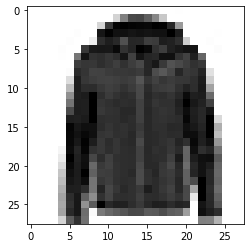

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap = "binary")
    plt.show()

show_single_image(x_train[0])

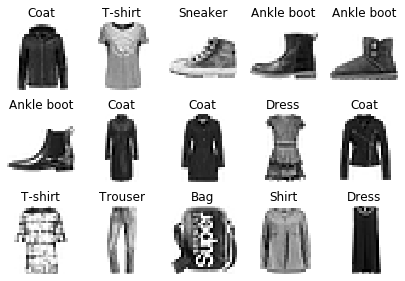

In [5]:
def show_imgs(n_rows, n_col, x_data,y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_col <len(x_data)
    plt.figure(figsize=(n_col * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_col):
            index = n_col * row +col
            plt.subplot(n_rows,n_col,index +1)
            plt.imshow(x_data[index],cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names =['T-shirt', 'Trouser' ,'Pullover','Dress',
              'Coat', 'Sandal', 'Shirt', 'Sneaker',
              'Bag', 'Ankle boot']

show_imgs(3,5,x_train,y_train,class_names)
            

In [64]:
"""
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    # tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


model.compile(loss = 'sparse_categorical_crossentropy',
              # optimizer='sgd',
              metrics=['accuracy'])

In [65]:
model.layers


In [66]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#[none,784]*w+b ->[none,300]w.shape[784,300],b[300]


In [67]:
history = model.fit(x_train,y_train,epochs=5,
                    validation_data = (x_valid,y_valid))



Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 4s 75us/sample - loss: 4.0302 - accuracy: 0.6893 - val_loss: 0.8993 - val_accuracy: 0.7438
Epoch 2/5
55000/55000 [==============================] - 4s 69us/sample - loss: 0.8740 - accuracy: 0.7313 - val_loss: 1.0876 - val_accuracy: 0.7378
Epoch 3/5
55000/55000 [==============================] - 4s 72us/sample - loss: 0.8724 - accuracy: 0.7550 - val_loss: 0.9799 - val_accuracy: 0.7884
Epoch 4/5
55000/55000 [==============================] - 4s 71us/sample - loss: 0.8393 - accuracy: 0.7606 - val_loss: 1.5354 - val_accuracy: 0.7654
Epoch 5/5
55000/55000 [==============================] - 4s 64us/sample - loss: 0.8274 - accuracy: 0.7635 - val_loss: 0.9669 - val_accuracy: 0.7636


In [53]:
type(history)

tensorflow.python.keras.callbacks.History

In [68]:
history.history

{'loss': [4.03024035764174,
  0.8740064941666343,
  0.8724445646546104,
  0.8393298921585083,
  0.8273525394222954],
 'accuracy': [0.6892909, 0.7313273, 0.755, 0.7606, 0.76354545],
 'val_loss': [0.8993330618858337,
  1.0876284586668015,
  0.9798890496253967,
  1.5353708806037902,
  0.9669379377365113],
 'val_accuracy': [0.7438, 0.7378, 0.7884, 0.7654, 0.7636]}

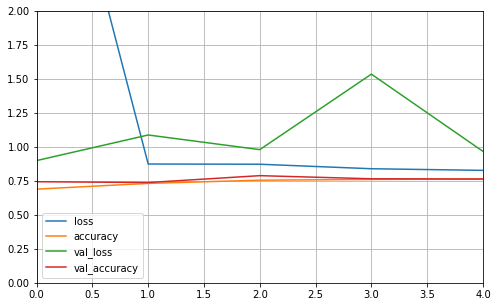

In [70]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.show()

plot_learning_curves(history)
